In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import keras_ocr
import pandas as pd
import os

In [4]:
# pylint:disable=too-many-locals
def warpBox(image,
            box,
            target_height=None,
            target_width=None,
            margin=0,
            cval=None,
            return_transform=False,
            skip_rotate=False):
    """Warp a boxed region in an image given by a set of four points into
    a rectangle with a specified width and height. Useful for taking crops
    of distorted or rotated text.
    Args:
        image: The image from which to take the box
        box: A list of four points starting in the top left
            corner and moving clockwise.
        target_height: The height of the output rectangle
        target_width: The width of the output rectangle
        return_transform: Whether to return the transformation
            matrix with the image.
    """
    if cval is None:
        cval = (0, 0, 0) if len(image.shape) == 3 else 0
    if not skip_rotate:
        box, _ = keras_ocr.tools.get_rotated_box(box)
    w, h = keras_ocr.tools.get_rotated_width_height(box)
    margin = h*margin
    assert (
        (target_width is None and target_height is None)
        or (target_width is not None and target_height is not None)), \
            'Either both or neither of target width and height must be provided.'
    if target_width is None and target_height is None:
        target_width = w
        target_height = h
    scale = min(target_width / w, target_height / h)
    M = cv2.getPerspectiveTransform(src=box,
                                    dst=np.array([[margin, margin], [scale * w - margin, margin],
                                                  [scale * w - margin, scale * h - margin],
                                                  [margin, scale * h - margin]]).astype('float32'))
    crop = cv2.warpPerspective(image, M, dsize=(int(scale * w), int(scale * h)))
    target_shape = (target_height, target_width, 3) if len(image.shape) == 3 else (target_height,
                                                                                   target_width)
    full = (np.zeros(target_shape) + cval).astype('uint8')
    full[:crop.shape[0], :crop.shape[1]] = crop
    if return_transform:
        return full, M
    return full


In [27]:
def calc_box(img_path, detector):
    low_text_options = [0.3, 0.2, 0.1, 0.05, 0.01, 0.001, 0]
    low_text_index = 0
    img = keras_ocr.tools.read(img_path)
    image = keras_ocr.detection.compute_input(img)
    bboxes = keras_ocr.detection.getBoxes(detector.model.predict(np.array([image])), 
                                         text_threshold=0.9)

    while bboxes[0].shape[0]>1:
        bboxes = keras_ocr.detection.getBoxes(detector.model.predict(np.array([image])), 
                                             text_threshold=low_text_options[low_text_index], 
                                             detection_threshold = 0.01)
        low_text_index +=1
    return bboxes, img
detector = keras_ocr.detection.Detector()


Looking for /home/kamel/.keras-ocr/craft_mlt_25k.h5


In [31]:
bboxes, image = calc_box(img_path='output/default/00000155.jpg', detector=detector)
bboxes

[array([[[ 0.0000000e+00,  0.0000000e+00],
         [ 2.4000000e+02,  0.0000000e+00],
         [ 2.4000000e+02,  5.4000000e+01],
         [-1.6532732e-15,  5.4000000e+01]]], dtype=float32)]

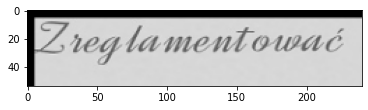

In [34]:
boxed = warpBox(image, bboxes[0][0], margin = 0.1)
plt.imshow(boxed)

In [30]:
bboxes, image = calc_box(img_path='output/default/00000155.jpg', detector=detector)
boxed = warpBox(image, bboxes[0][0], margin = 0.1)



plt.imshow(keras_ocr.tools.drawBoxes(image, bboxes[0][0]))
plt.figure()
plt.imshow(boxed)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/drawing.cpp:2435: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'polylines'


In [21]:
def combine_single_generated_set(folder):
  df = pd.read_table(folder +'/tmp_labels.txt', sep = ' ',header = None, names=['id', 'transcription'], dtype={'id': object})
  files = pd.DataFrame({'path':os.listdir(folder)})

  files['id'] = [x.replace('.jpg','') for x in files.path]
  files['path'] = [ folder + '/'+ x for x in files['path']]
  df = df.merge(files, how='left', on='id')
  return df

In [23]:
df = combine_single_generated_set('output/default')
df.head()

,id,transcription,path
0,00000002,Wyekstrahować,output/default/00000002.jpg
1,00000000,Zaniechiwać,output/default/00000000.jpg
2,00000003,Frywolny,output/default/00000003.jpg
3,00000001,Polichromiczny,output/default/00000001.jpg
4,00000005,Budżetowy,output/default/00000005.jpg


In [42]:
cat(['./data/fonts/'+ i for i in  os.listdir('data/fonts/1001fonts')])

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [46]:
for i in ['./data/fonts/1001fonts/'+ i for i in  os.listdir('data/fonts/1001fonts')]:
    print(i)

./data/fonts/1001fonts/Anysome Italic.otf
./data/fonts/1001fonts/DancingintheMinefields.ttf
./data/fonts/1001fonts/Give You What You Like - OTF.otf
./data/fonts/1001fonts/KGFeeling22.ttf
./data/fonts/1001fonts/KGAlwaysAGoodTime.ttf
./data/fonts/1001fonts/Gruenewald VA 1K.ttf
./data/fonts/1001fonts/Mf Delicate Little Flower.ttf
./data/fonts/1001fonts/GreatVibes-Regular.ttf
./data/fonts/1001fonts/KGOneMoreNight.ttf
./data/fonts/1001fonts/._Freehand-Blockletter-Bold-trial.ttf
./data/fonts/1001fonts/Mf Summertime.ttf
./data/fonts/1001fonts/Caranda Personal Use.ttf
./data/fonts/1001fonts/KGWhenOceansRise.ttf
./data/fonts/1001fonts/PatrickHand-Regular.ttf
./data/fonts/1001fonts/OvertheRainbow.ttf
./data/fonts/1001fonts/Behind Green Eyes - OTF.otf
./data/fonts/1001fonts/Going Foward - TTF.ttf
./data/fonts/1001fonts/New Balance Personal Use.ttf
./data/fonts/1001fonts/._New Balance Personal Use.ttf
./data/fonts/1001fonts/ArchitectsDaughter-Regular.ttf
./data/fonts/1001fonts/Marshmallows and Cho

In [48]:
for i in ['./1001fonts/'+ i for i in  os.listdir('data/fonts/ef_1001fonts')]:
    print(i)

./1001fonts/What's My Age Again - TTF.ttf
./1001fonts/Anothershabby_pro_heavy_v2_trial.ttf
./1001fonts/Anysome.otf
./1001fonts/Hug Me Tight - OTF.otf
./1001fonts/Chasing Stars - TTF.ttf
./1001fonts/Adlery-Pro-Blockletter-trial.ttf
./1001fonts/Borders Divide But Hearts Shall Conquer - OTF.otf
./1001fonts/Valentine Day Personal Use.ttf
./1001fonts/Unicorn Sparkles - TTF.ttf
./1001fonts/LaterAllie-Gator.ttf
./1001fonts/Anothershabby_pro_regular_v3_trial.ttf
./1001fonts/Think harder.otf
./1001fonts/NexaRustSlab-BlackShadow01.otf
./1001fonts/Texas Spring - TTF.ttf
./1001fonts/Lazy Spring Day - TTF.ttf
./1001fonts/Your Star - TTF.ttf
./1001fonts/I Heart Summer - TTF.ttf
./1001fonts/You're So Cool - OTF.otf
./1001fonts/Living Selflessly - TTF.ttf
./1001fonts/Chasing Stars - OTF.otf
./1001fonts/Keep the Faith - TTF.ttf
./1001fonts/White Chocolate Mint - TTF.ttf
./1001fonts/I Love Glitter - TTF.ttf
./1001fonts/Otterly Adorable - OTF.otf
./1001fonts/Sunny Spring Day - OTF.otf
./1001fonts/Chapter